# Polymer Walks

**Resources**

Gustav-Stresemann-Institut e.V. für Übernationale Bildung und Europäische Zusammenarbeit et al., eds. 2004. Computational Soft Matter: From Synthetic Polymers to Proteins; Winter School, 29 February - 6 March 2004, Gustav-Stresemann-Institut, Bonn, Germany. 2: Lecture Notes. Jülich: NIC. https://web.pa.msu.edu/people/duxbury/courses/phy480/BaschnagelReview2004.pdf


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as random


In [31]:
class ObstacleLattice:
    """
    A lattice that contains the coordinates for the obstacles and chains
    """
    def __init__(self,N_chain = 20, N_obstacles=1000):
        
        
        # Create a random array of obstacles
        self.obstacles = np.random.randint(-100,100,(2,N_obstacles))
        
        # Create an array for the chain
        self.chain = np.empty((2,N_chain))
        self.chain[:] = np.nan
        
class SquareMove:
    """Contains moves and probability for each move"""
    def __init__(self):
        
        self.moves = moves = [[1,0],[0,1], [-1,0], [0,-1]]
        self.probs = probs = [i*1/len(moves)+1/len(moves) for i in range(len(moves))]
    

    def get_move(self):
        """
        returns a move based off of probability
        """
        pmove = random.random()
        for idx, prob in enumerate(self.probs):
            if pmove < prob:
                break
        return self.moves[idx]
    

def move_chain_random(ltc,moves):
    """
    move the chain in a random direction
    """
    chain = ltc.chain
    obstacle = ltc.obstacles
    if np.isnan(chain).any():
        pass
    
def initialize_chain(ltc, moves):
    """
    Create an initial chain
    """
    def create():
        # First point is origin
        chain = ltc.chain.copy()
        chain[:,0]=[0,0]
        # First move is always good
        chain[:,1] = chain[:,0] + moves.get_move()

        for idx in range(2,chain.shape[1]):
            new_point = chain[:,idx-1]
            while np.all(new_point == chain[:, idx-1]):
                new_point = chain[:,idx-1] +  moves.get_move()
            chain[:,idx]=new_point
        return chain
            
            
    assert ltc.chain.shape[1]>1, 'chain must be greater than one point'
    searching =True
    count = 0 
    while searching:
        count += 1
        searching = False
        chain = create()
        for idx in range(chain.shape[1]-1):
            if searching:
                break
            for jdx in range(idx+1,chain.shape[1]):
                if np.all(chain[:,idx]==chain[:,jdx]):
                    searching = True
                    break
    ltc.chain = chain
    return count 
        
        
def plot_lattice(ltc, lims=(-10,10), draw_lattice=False):
    """
    draw the lattice with the obstacles and chain
    
    :param ltc: lattice object that will be drawn
    :param lims: the min and max values to draw for the grid
    """
    fig, ax =  plt.subplots()
    
    # Draw lattice dots:
    if draw_lattice:
        x = np.arange(-100,101)
        y = np.arange(-100,101)
        xx,yy = np.meshgrid(x,y)
        ax.scatter(xx,yy, marker = '.', alpha=0.5)
    
    # Draw Obstacles
    ax.scatter(ltc.obstacles[0,:], ltc.obstacles[1,:], marker = 's', alpha=0.5, color='r')
    
    # Draw Chain
    ax.plot(ltc.chain[0,:], ltc.chain[1,:])
    
    #Set the limits
    ax.set_ylim(lims)
    ax.set_xlim(lims)
    return ax

    
    
    

In [32]:

ltc = ObstacleLattice(N_chain=30)
mv = SquareMove()
initialize_chain(ltc,mv)

7860

<AxesSubplot:>

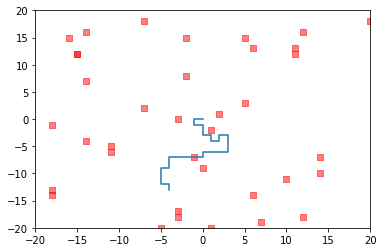

In [33]:
plot_lattice(ltc, lims=(-20,20))

In [32]:
np.isnan(ltc.chain).any()

True

In [36]:
x = np.random.randint(0,5,(2,4))

In [37]:
x[:,0] + [0,1]

array([2, 1])

In [55]:
ltc.chain

array([[ 0.,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [ 0., -1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]])

In [82]:
x

array([[2, 2, 1, 4],
       [0, 4, 2, 4]])

In [83]:
[2,0] in x

C:\Software\MiniConda\envs\dsp\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False